In [1]:
import os
import cv2
import numpy as np
import keras
if not hasattr(keras.utils, 'generic_utils'):
    keras.utils.generic_utils = keras.utils
from matplotlib import pyplot as plt
#Install the patchify package
!pip install patchify
from patchify import patchify #Now this import should work
from PIL import Image

# Install segmentation_models_pytorch
!pip install segmentation-models-pytorch
import segmentation_models_pytorch as sm # Updated import statement

import tensorflow as tf
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [2]:
root_dir='/content/drive/MyDrive/DeepLearning/Semantic segmentation dataset'

In [3]:
patch_size=256

In [4]:
image_dataset = []
for path, subdirs, files in os.walk(root_dir):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':
        images = sorted(os.listdir(path))
        for i, image_name in enumerate(images):
            if image_name.endswith(".jpg"):

                image = cv2.imread(path+"/"+image_name, 1)

                SIZE_X = (image.shape[1]//patch_size)*patch_size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size

                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))
                image = np.array(image)

                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):

                        single_patch_img = patches_img[i,j,:,:]

                        #Using minmaxscaler instead of just dividing by 255
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        single_patch_img = single_patch_img[0] #Extra unecessary dimension that patchify adds.

                        image_dataset.append(single_patch_img)

In [5]:
mask_dataset = []
for path, subdirs, files in os.walk(root_dir):

    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks':
        masks = sorted(os.listdir(path) )
        for i, mask_name in enumerate(masks):
            if mask_name.endswith(".png"):

                mask = cv2.imread(path+"/"+mask_name, 1)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)

                SIZE_X = (mask.shape[1]//patch_size)*patch_size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size

                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))
                mask = np.array(mask)

                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)

                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):

                        single_patch_mask = patches_mask[i,j,:,:]
                        #No need to scale masks
                        single_patch_mask = single_patch_mask[0]
                        mask_dataset.append(single_patch_mask)

In [6]:
image_dataset=np.array(image_dataset)
mask_dataset=np.array(mask_dataset)

In [7]:
image_dataset.shape

(1305, 256, 256, 3)

<Axes: >

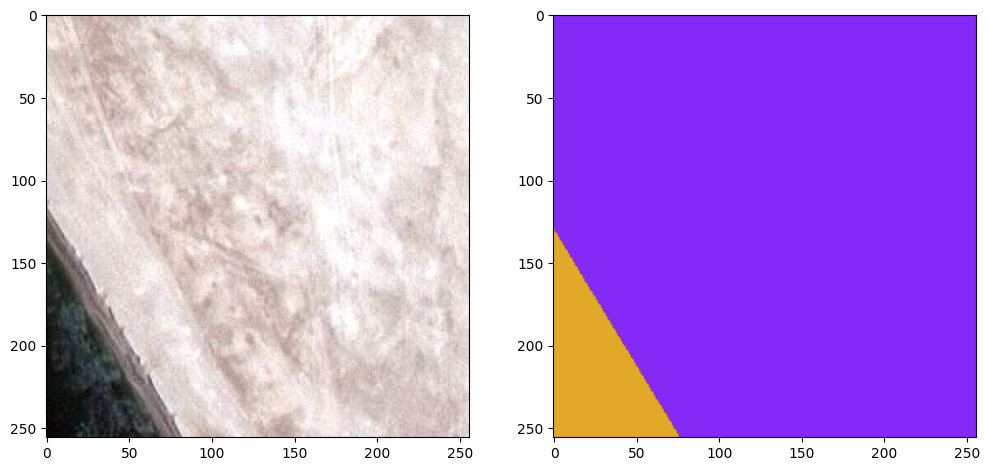

In [17]:
import random
import numpy as np
image_number=random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (256, 256, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (256, 256, 3)))
plt.subplot(122)